In [57]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('C:/Users/johm7/PYTHON/python-data-analysis-master/data/titanic_train.csv')
df_test = pd.read_csv('C:/Users/johm7/PYTHON/python-data-analysis-master/data/titanic_test.csv')
df_train.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [58]:
print(df_train.info())
print('-----------------------------------------------')
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB
None
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  --

In [59]:
# 필요없는 피처 제거
df_train = df_train.drop(['name', 'ticket', 'body', 'cabin', 'home.dest'], axis=1)
df_test = df_test.drop(['name', 'ticket', 'body', 'cabin', 'home.dest'], axis=1)

0    563
1    353
Name: survived, dtype: int64


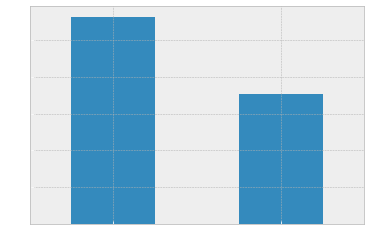

In [60]:
print(df_train['survived'].value_counts())
df_train['survived'].value_counts().plot.bar().tick_params(colors='white')

3    498
1    230
2    188
Name: pclass, dtype: int64


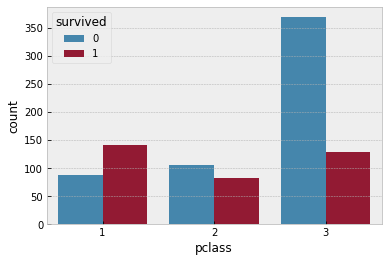

In [61]:
# survived 피처를 기준으로 그룹을 나누어 그룹별 pclass 피처의 분포를 살펴보자
print(df_train['pclass'].value_counts())
ax = sns.countplot(x = 'pclass', hue = 'survived', data = df_train)

In [91]:
from scipy import stats

#두 집단의 피처를 비교해주며 탐색작업을 자동화하는 함수 정의
def valid_features(df, col_name, distribution_check=True):
    
    #두 집단 (survived =1, survived=0)의 분포 그래프 출력
    g = sns.FacetGrid(df, col='survived')
    g.map(plt.hist, col_name, bins=30)
    
    #두 집단(survived=1, survived=0)의 표준편차 출력
    titanic_survived = df[df['survived'] == 1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print('data std is', '%.2f' % np.std(titanic_survived_static))
    
    titanic_n_survived = df[df['survived'] == 0]
    titanic_n_survived_static = np.array(titanic_n_survived[col_name])
    print('data std is', '%.2f' % np.std(titanic_n_survived_static)) 
    
    # T-test 로 두 집단 평균 차이 검정
    tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name], equal_var = False)
    print('The t-statistic and p-value assuming equal variances is %.3f and %3.f' % tTestResult)
    print('The t-statistic and p-value not assuming equal variances is %.3f and %3.f' % tTestResultDiffVar)
    
    if distribution_check:
        # Sharpiro-Wilk 정규성 검정
        print('The w-statistic and p-value in Survived %.3f and %.3f' % stats.shapiro(titanic_survived[col_name]))
        print('The w-statistic and p-value in Non-Survived %.3f and %.3f' % stats.shapiro(titanic_n_survived[col_name]))

data std is 13.24
data std is 12.05
The t-statistic and p-value assuming equal variances is -0.553 and   1
The t-statistic and p-value not assuming equal variances is -0.541 and   1
The w-statistic and p-value in Survived 0.972 and 0.000
The w-statistic and p-value in Non-Survived 0.940 and 0.000


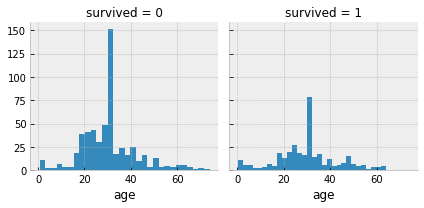

In [92]:
# valid_features 함수 실행. age, sibsp 피처 탐색
valid_features(df_train[df_train['age'] > 0], 'age' , distribution_check =True)

data std is 0.64
data std is 1.34
The t-statistic and p-value assuming equal variances is -2.118 and   0
The t-statistic and p-value not assuming equal variances is -2.446 and   0


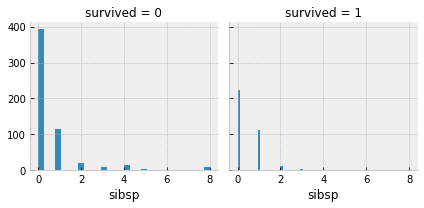

In [64]:
valid_features(df_train, 'sibsp', distribution_check=False)

In [65]:
# age의 결측값을 평균값으로 대체
replace_mean = df_train[df_train['age']>0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

# embark : 2개의 결측값을 최빈값으로 대체
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

# 원-핫 인코딩을 위한 통합 데이터 프레임 생성
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

# pandas 패키지를 이용한 원-핫 인코딩 수행
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]

df_train.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 훈련 데이터, 테스트 데이터 분리
x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values

In [79]:
#로지스틱 회귀 모델
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

In [82]:
# 지표 출력
print("accuracy : %.2f" % accuracy_score(y_test, y_pred)) #잘 맞춘거
print("precision : %.3f" % precision_score(y_test, y_pred)) #실제 중 맞게 예측 한 것
print("recall : %.3f" % recall_score(y_test, y_pred)) #예측한 것 중 실제와 맞는 것
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy : 0.80
precision : 0.756
recall : 0.673
F1 : 0.712


In [83]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)

[[214  32]
 [ 48  99]]


In [84]:
from sklearn.metrics import roc_curve, roc_auc_score

# AUC 출력
false_positive_rate, true_posotive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print('AUC : %.3f' % roc_auc)

AUC : 0.838


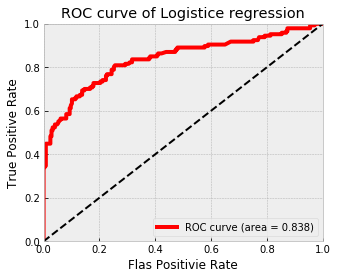

In [88]:
# ROC curve 그래프
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_posotive_rate, label = 'ROC curve (area = %0.3f)' % roc_auc, color = 'red', linewidth = 4.0)
plt.plot([0,1] , [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Flas Positivie Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistice regression')
plt.legend(loc='lower right')